In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

log = pd.read_csv("../res/csv/grid２.csv")


In [2]:
a = log.drop_duplicates().sort_values(by="loss").reset_index()


In [11]:
a.head(10).to_csv("../res/csv/grid_res.csv")


In [4]:
delta = 0.2

x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
l = len(x)
Z = np.zeros(shape=(l, l))
X, Y = np.meshgrid(x, y)


In [6]:
a

,index,x1,x10,y1,y2,loss
0,169,-4,-2,0.001244,0.393003,0.000602
1,170,-4,0,0.015481,0.459999,0.002046
2,149,-6,-2,-0.026604,0.455534,0.002154
3,190,-2,0,0.043334,0.397462,0.002279
4,148,-6,-4,-0.040838,0.388544,0.002506
...,...,...,...,...,...,...
395,361,16,-18,0.165869,-0.768382,1.433829
396,382,18,-16,0.207977,-0.764027,1.439260
397,360,16,-20,0.151624,-0.835325,1.592560
398,381,18,-18,0.193729,-0.830976,1.596223


In [8]:
for i in range(l):
    Z[i] = a[a["x10"] == -20 + i*2].sort_values(by="x1")["loss"]


<IPython.core.display.Javascript object>


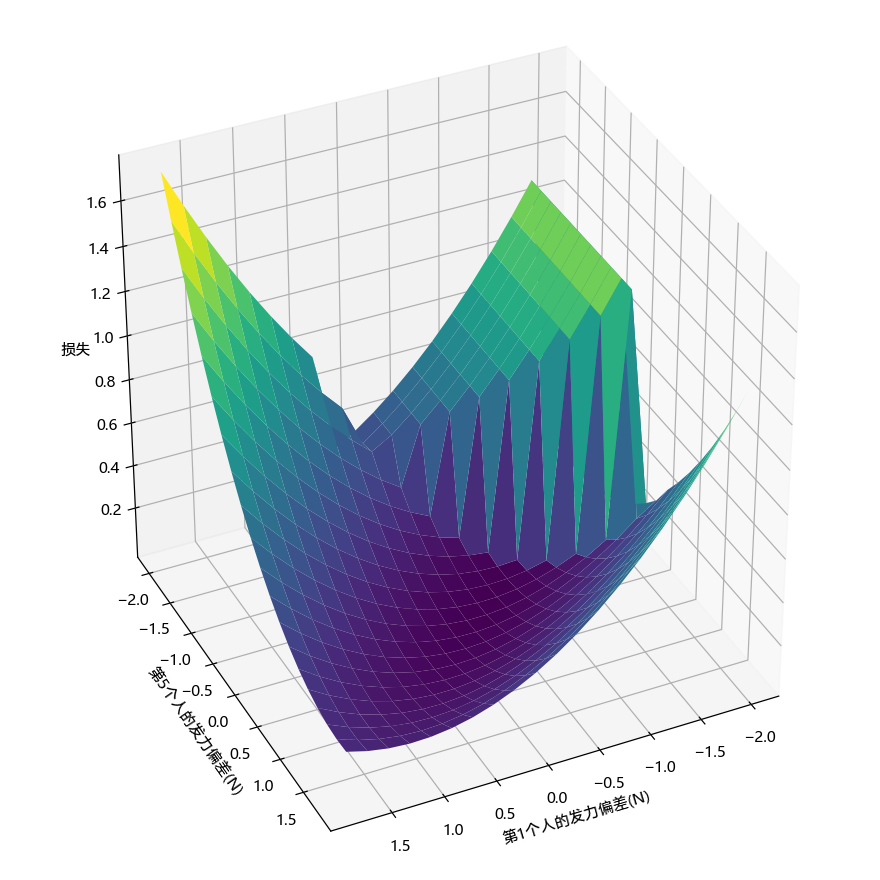

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.set_xlabel("第1个人的发力偏差(N)")
ax.set_ylabel("第5个人的发力偏差(N)")
ax.set_zlabel("损失")
ax.plot_surface(X, Y, Z,
                rstride=1,
                cstride=1,
                cmap=plt.get_cmap('viridis'))
